In [66]:
# Group number 1
# Determining and removing drawbacks of exponential and running mean. Task 1. Drawbacks of running mean
# Team members: Stepan Perminov, Polina Ponomareva, Kirill Shcherbakov, Daniil Svirskiy

# Library importing
import numpy as np
import matplotlib.pyplot as plt

# Size of the trajectory
n = 200

In [67]:
# Variances
sigma_w2 = 0.08**2
sigma_et2 = 0.05

# Generation of normally distributed random noises with zero mathematical expectation and corresponding variances
w = np.random.normal(0, np.sqrt(sigma_w2), n-1)
et = np.random.normal(0, np.sqrt(sigma_et2), n)

In [377]:
# Initialization of arrays
X = np.zeros((n,1))
A = np.zeros((n,1))
z = np.zeros((n,1))

# Arrays to draw explaining curves
X_ch = np.zeros((16,1))
X_ch2 = np.zeros((16,1))

# Initial conditions
A[0] = 1
# Window size fro sunning mean application
M = 15
# The period of the true trajectory
T = M/2.5
print(T)

# Generation of A
for i in range(1,len(A)):
    A[i] = A[i-1] + w[i-1]

# Generation of true trajectory X
for i in range(len(X)):
    X[i] = A[i]*np.sin(np.pi*2*(i+1)/T + 3)

# Generation of a sinus trajectory
for i in range(16):
    X_ch[i] = np.sin(np.pi*2*(i)/T + np.pi/2)

# Generation of measurements z of the process X
for i in range(len(z)):
    z[i] = X[i] + et[i]

6.0


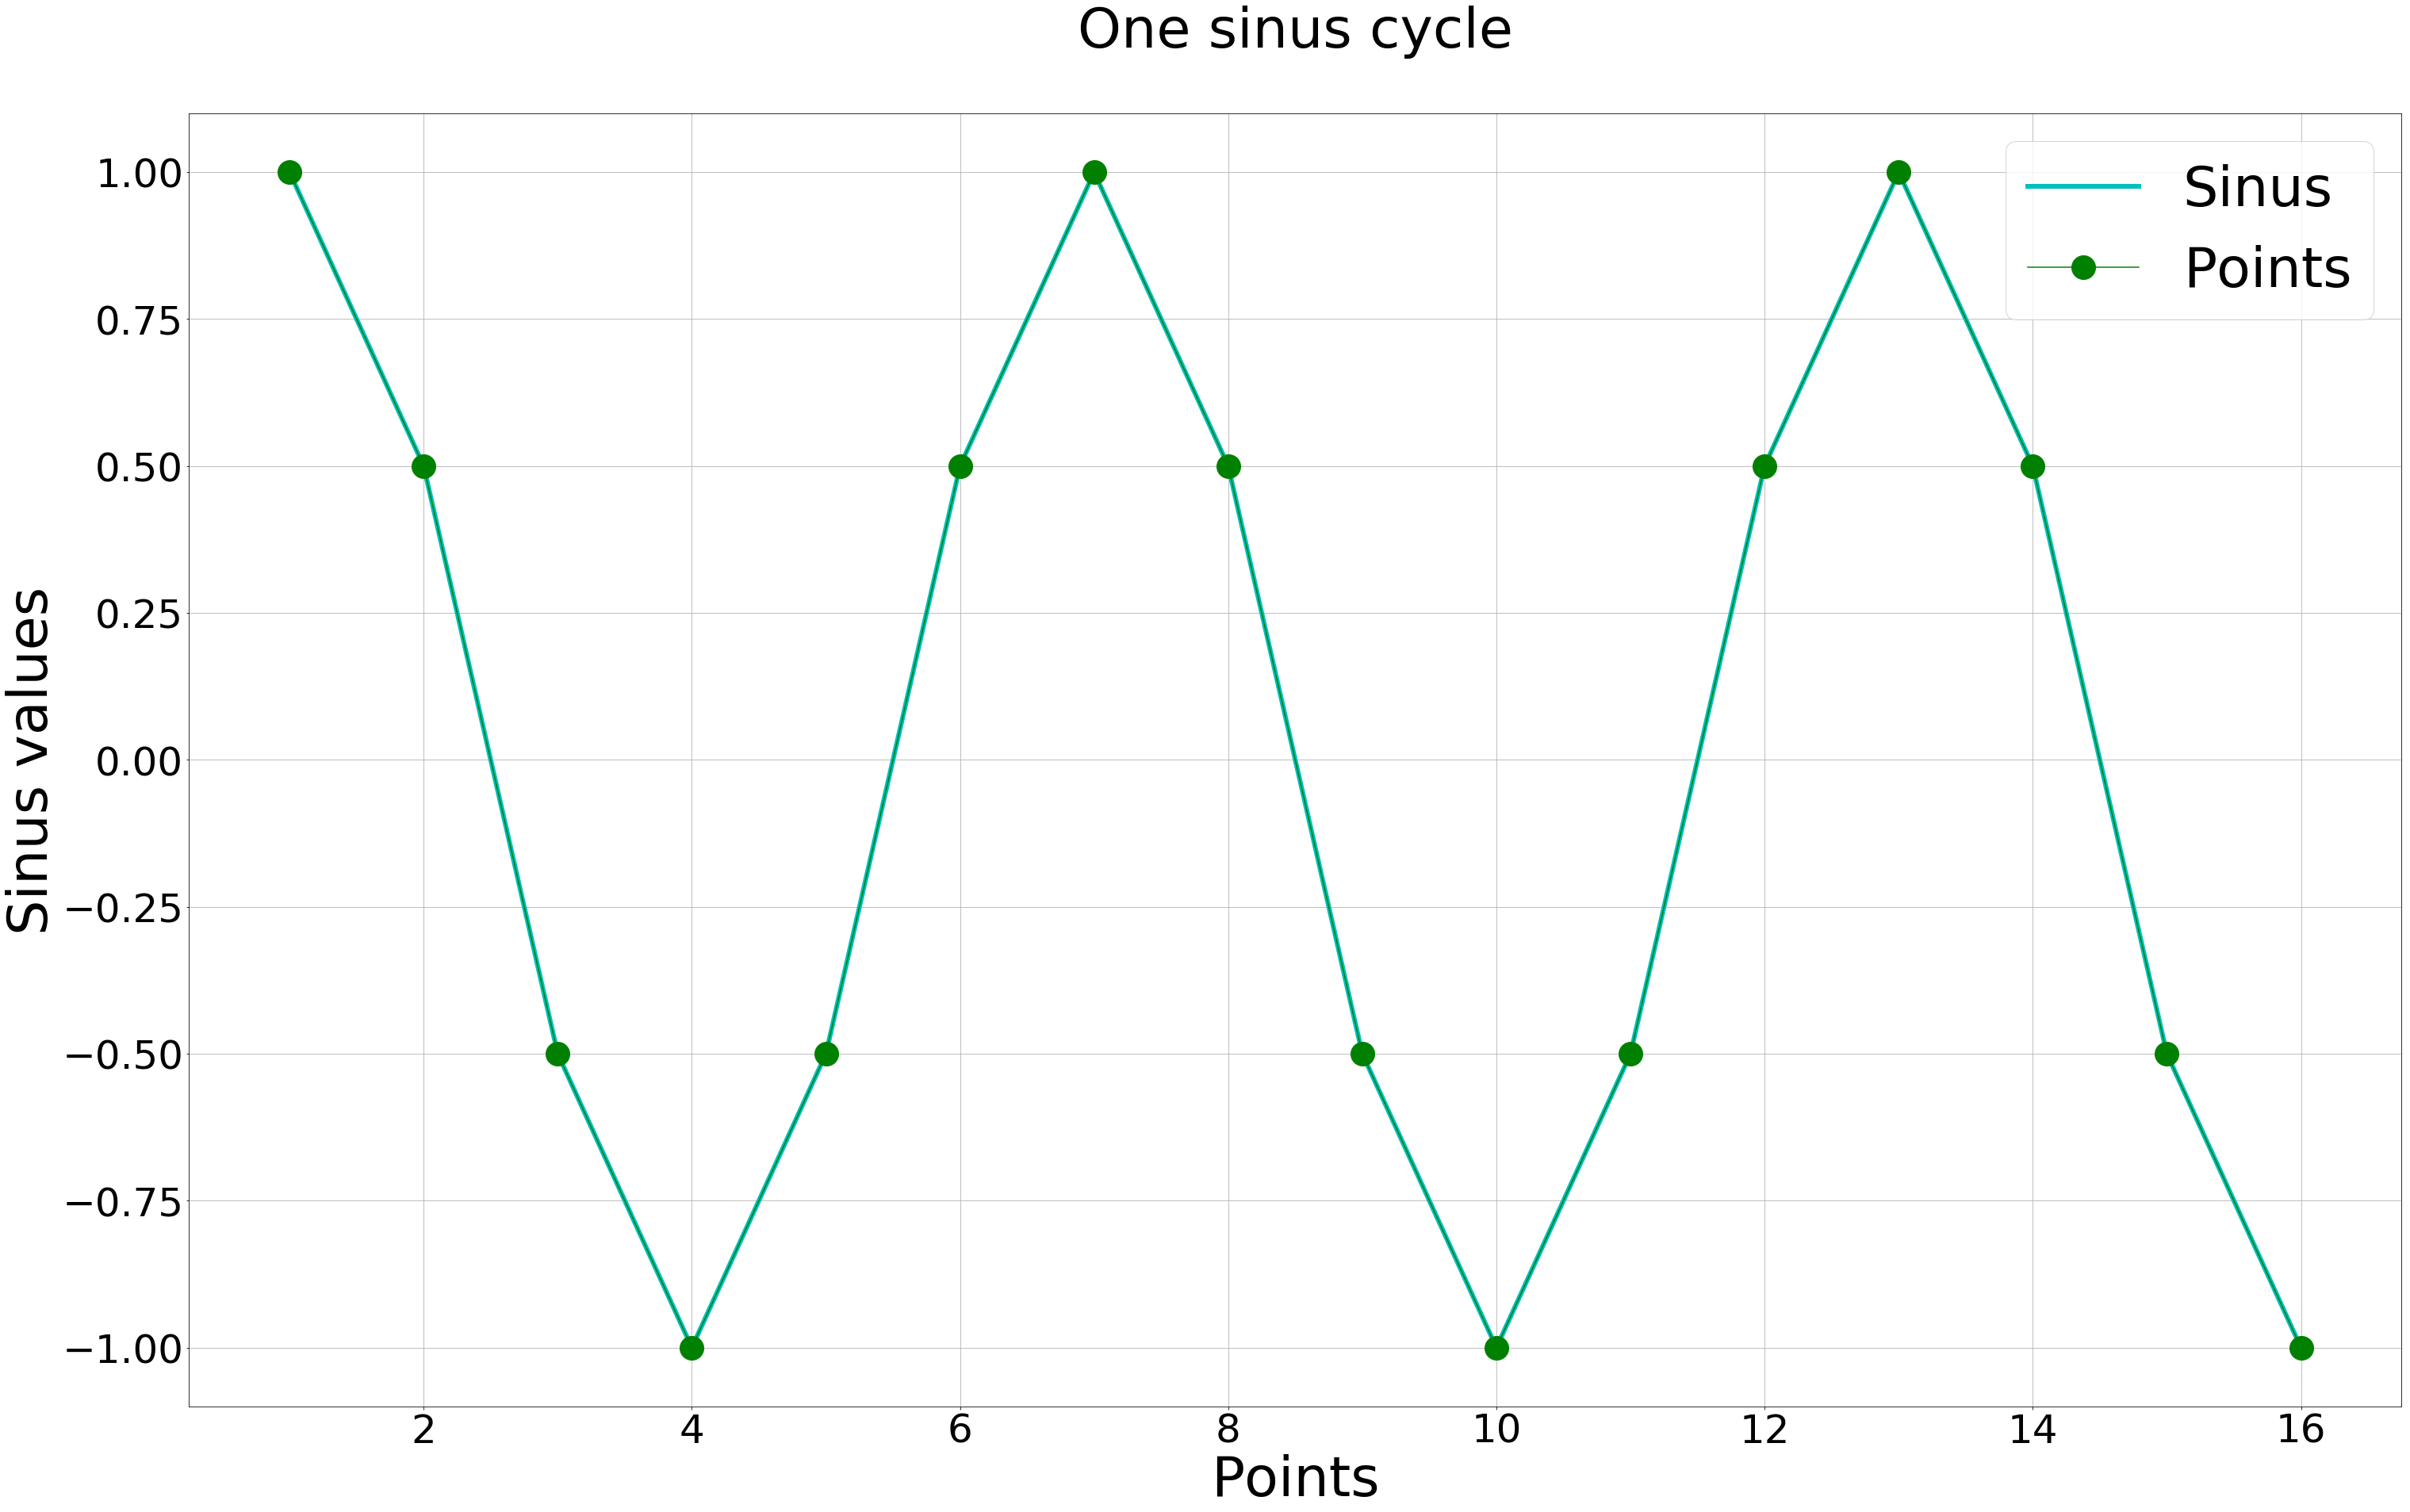

In [378]:
# Sinus trajectory plot
plt.plot(np.array(range(1,17)), X_ch, linewidth = 6, label = "Sinus", color = "c")
plt.plot(np.array(range(1,17)), X_ch, marker = "o", markersize = 30, label = "Points", color = "g")
plt.legend(fontsize = 70)
plt.rcParams["figure.figsize"] = (50,30)
plt.tick_params(labelsize = 50)
plt.grid()
plt.xlabel("Points", fontsize = 70)
plt.ylabel("Sinus values", fontsize = 70)
plt.title("One sinus cycle\n", fontsize = 70)
#plt.title("Comparison of processes\n", fontsize = 70)
plt.show()

In [379]:
# Another sinus trajectory
for i in range(16):
    X_ch2[i] = np.sin(np.pi*2*(i)/T)

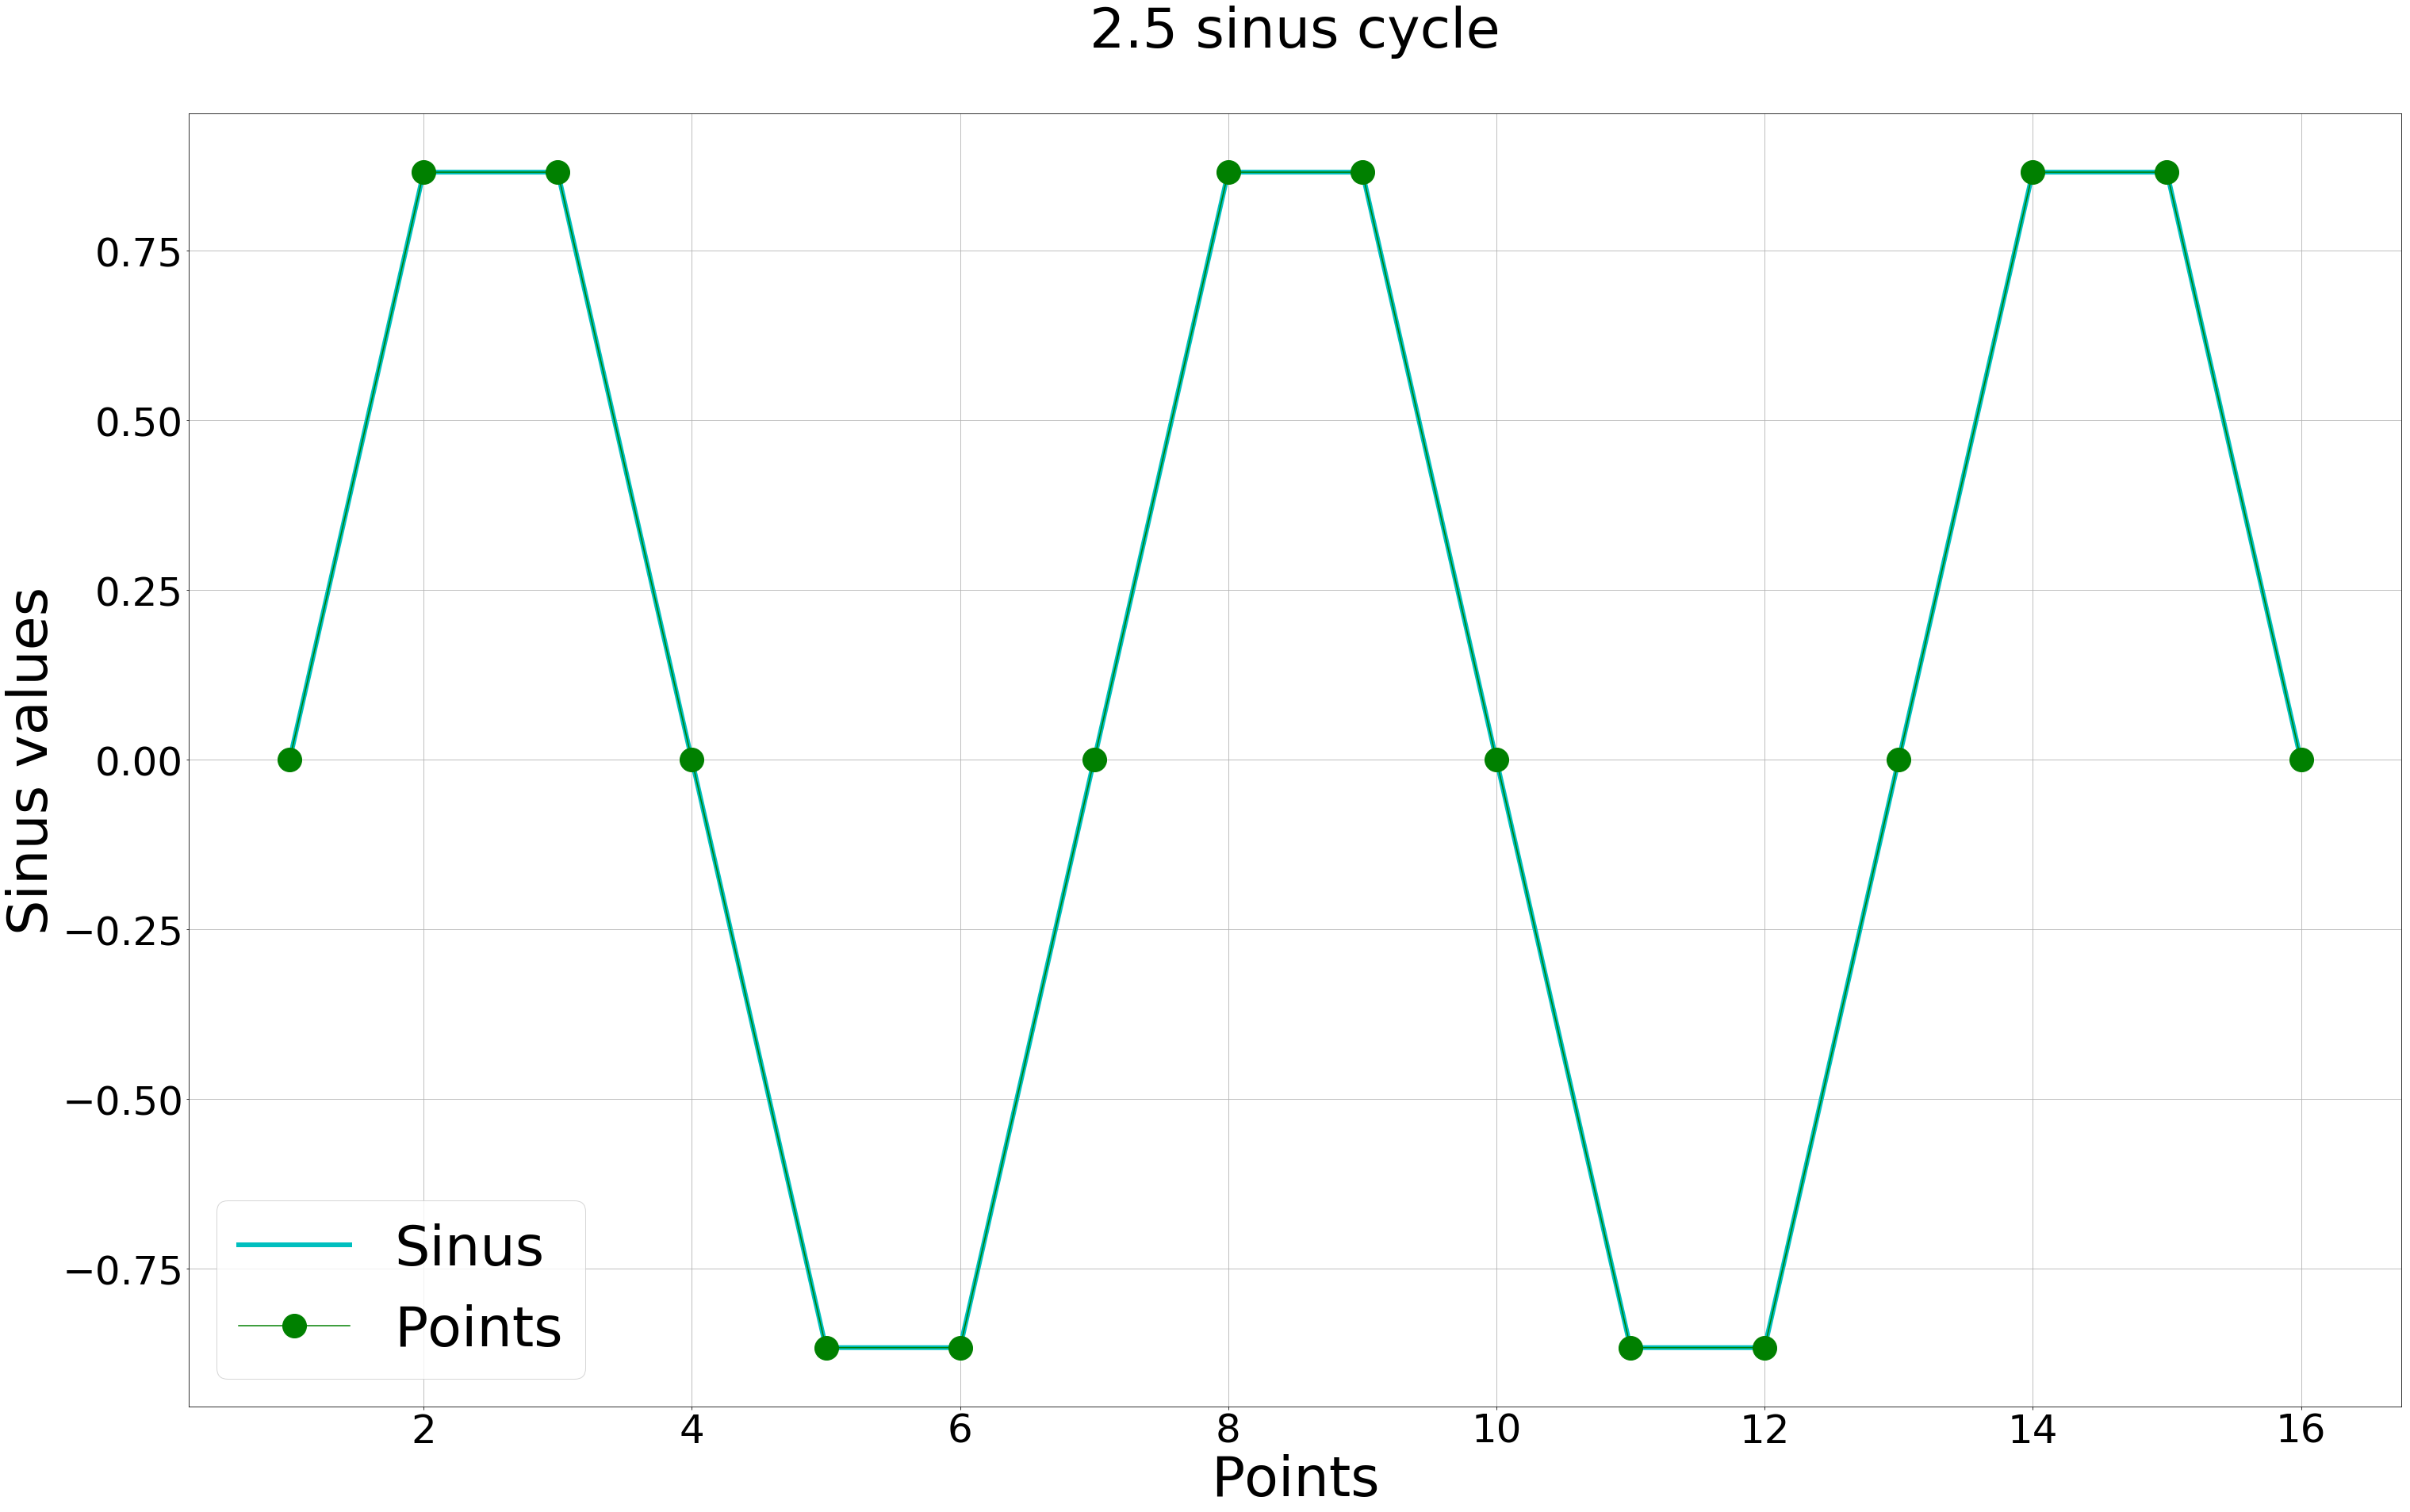

In [380]:
# Another sinus trajectory plot
plt.plot(np.array(range(1,17)), X_ch2, linewidth = 6, label = "Sinus", color = "c")
plt.plot(np.array(range(1,17)), X_ch2, marker = "o", markersize = 30, label = "Points", color = "g")
plt.legend(fontsize = 70)
plt.rcParams["figure.figsize"] = (50,30)
plt.tick_params(labelsize = 50)
plt.grid()
plt.xlabel("Points", fontsize = 70)
plt.ylabel("Sinus values", fontsize = 70)
plt.title("2.5 sinus cycle\n", fontsize = 70)
#plt.title("Comparison of processes\n", fontsize = 70)
plt.show()

In [381]:
# Running mean application
run_mean = np.zeros((n,1))

M_half = M/2
print(M_half)

# First 3 and last 3 measurements are replaced by corresponding average values
beg_mean = np.sum(z[:M_half])/len(z[:M_half])
end_mean = np.sum(z[len(z)-M_half:])/len(z[len(z)-M_half:])

# Running mean calculation
for i in range(len(z)):
    if i <= M_half-1:
        run_mean[i] = beg_mean
    elif i >= len(z)-M_half:
        run_mean[i] = end_mean
    else:
        run_mean[i] = np.sum(z[i-M_half:i+M_half+1])/len(z[i-M_half:i+M_half+1])
#         print(len(z[i-M_half:i+M_half+1]))



7


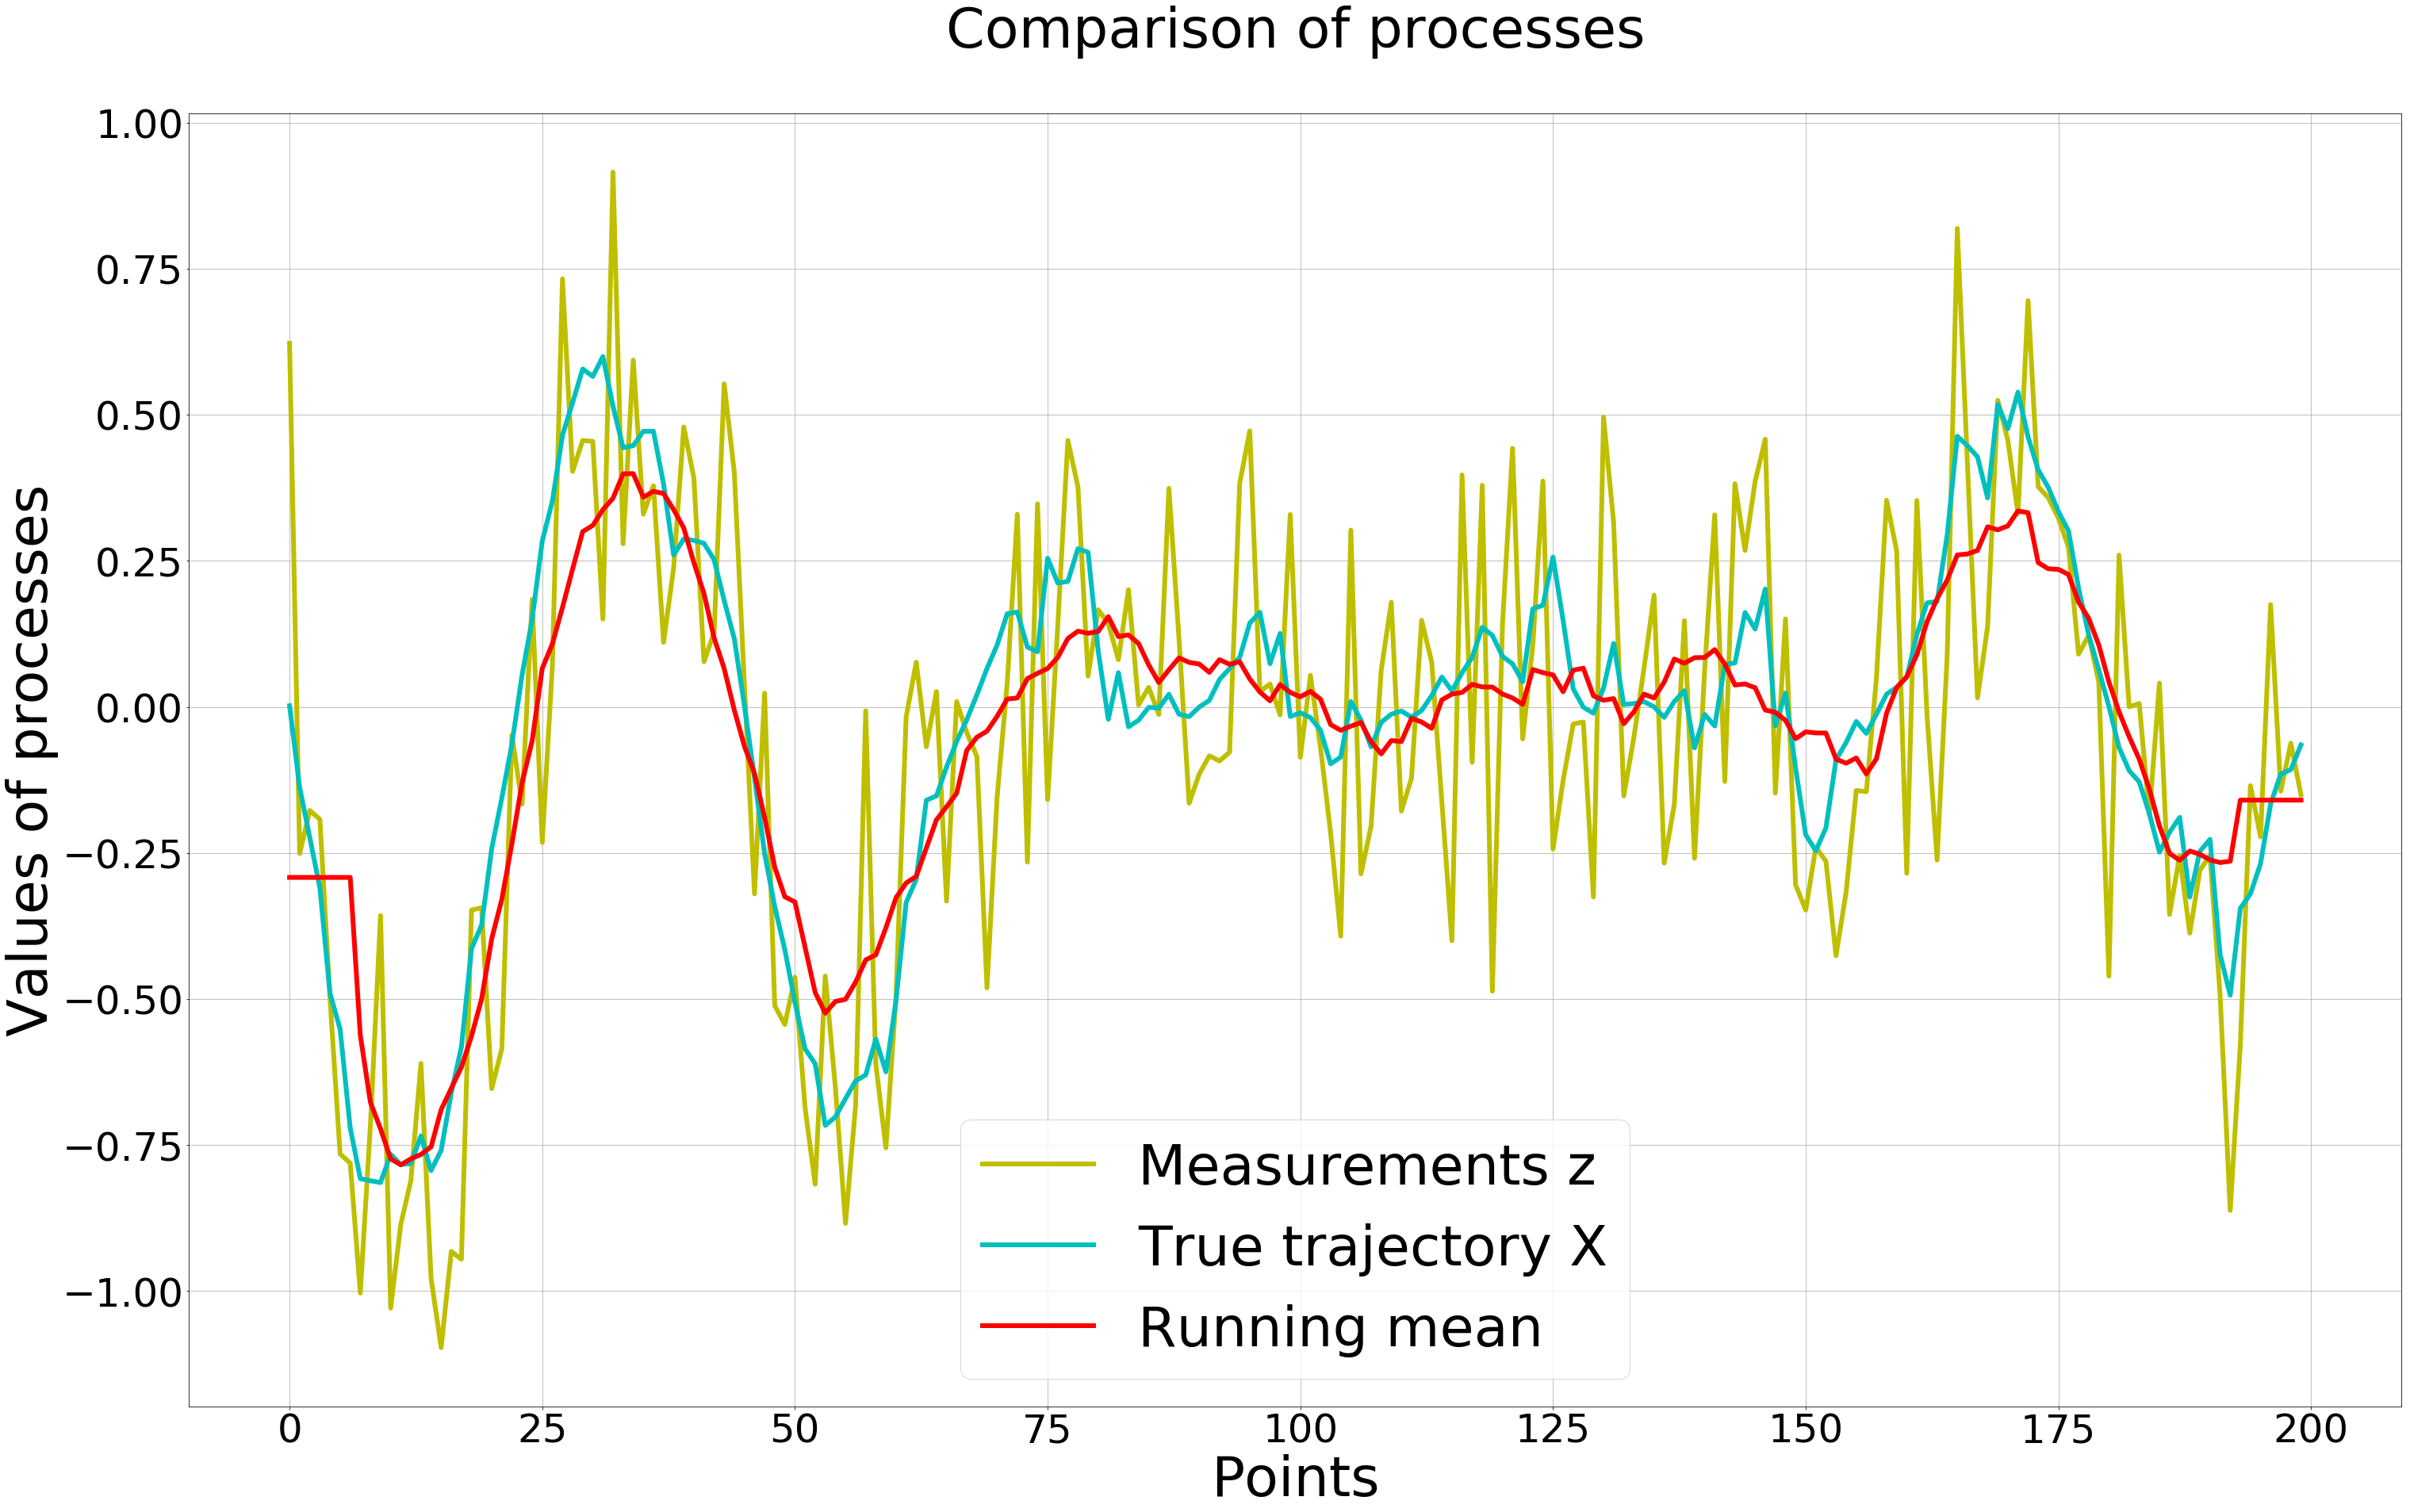

In [366]:
# Plotting of measurements, true values of process and running mean
plt.plot(z, linewidth = 6, label = "Measurements z", color = "y")
plt.plot(X, linewidth = 6, label = "True trajectory X", color = "c")
plt.plot(run_mean, linewidth = 6, label = "Running mean", color = "r")
plt.legend(fontsize = 70)
plt.rcParams["figure.figsize"] = (50,30)
plt.tick_params(labelsize = 50)
plt.grid()
plt.xlabel("Points", fontsize = 70)
plt.ylabel("Values of processes", fontsize = 70)
plt.title("Comparison of processes\n", fontsize = 70)
plt.show()